<a href="https://colab.research.google.com/github/NikSh1891/Data_Analyst_Portfolio/blob/main/Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/download?datasetVersionNumber=3")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nshishkin
Your Kaggle Key: ··········


100%|██████████| 35.9k/35.9k [00:00<00:00, 10.0MB/s]

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv('/content/supermarket-sales/supermarket_sales - Sheet1.csv', parse_dates=['Date'])

In [5]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
650,369-82-2676,B,Mandalay,Normal,Male,Electronic accessories,75.66,5,18.9150,397.2150,2019-01-15,18:22,Ewallet,378.30,4.761905,18.9150,7.8
63,199-75-8169,A,Yangon,Member,Male,Sports and travel,15.81,10,7.9050,166.0050,2019-03-06,12:27,Credit card,158.10,4.761905,7.9050,8.6
851,409-33-9708,A,Yangon,Normal,Female,Fashion accessories,98.48,2,9.8480,206.8080,2019-02-19,10:12,Ewallet,196.96,4.761905,9.8480,9.2
928,431-66-2305,B,Mandalay,Normal,Female,Electronic accessories,88.25,9,39.7125,833.9625,2019-02-15,20:51,Credit card,794.25,4.761905,39.7125,7.6
554,134-75-2619,A,Yangon,Member,Male,Electronic accessories,19.32,7,6.7620,142.0020,2019-03-25,18:51,Cash,135.24,4.761905,6.7620,6.9


### Предобработка данных

In [6]:
# Убираем заглавные символы
df.columns = map(str.lower, df.columns)
# Заменяем пробелы на нижнее подчеркивание
df.columns = df.columns.str.replace(' ', '_')
df.sample(1)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
323,563-91-7120,A,Yangon,Normal,Female,Fashion accessories,61.77,5,15.4425,324.2925,2019-03-08,13:21,Cash,308.85,4.761905,15.4425,6.7


In [7]:
# Удаляем дубликаты
df = df.drop_duplicates()
print(df.shape)

(1000, 17)


In [8]:
# Разобьем временные данные на отдельные столбцы и удалим исходные данные с датами
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['minute'] = pd.to_datetime(df['time']).dt.minute
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df = df.drop(['date'], axis=1)
df = df.drop(['time'], axis=1)

### Предварительный анализ

In [9]:
# Общие статистики
df.describe()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating,hour,minute,day,month,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,14.910000,30.09800,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,3.186857,16.88068,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,10.000000,0.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,12.000000,16.00000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,30.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,18.000000,44.00000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,20.000000,59.00000,31.000000,3.000000,2019.0


In [10]:
print("Размер датасета: ")
print(df.shape, '\n')

print("Типы данных в столбцах: ")
print(df.dtypes, '\n')

print("Кол-во пропущенных значений: ")
print(df.isnull().sum(), '\n')

Размер датасета: 
(1000, 20) 

Типы данных в столбцах: 
invoice_id                  object
branch                      object
city                        object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
tax_5%                     float64
total                      float64
payment                     object
cogs                       float64
gross_margin_percentage    float64
gross_income               float64
rating                     float64
hour                         int64
minute                       int64
day                          int64
month                        int64
year                         int64
dtype: object 

Кол-во пропущенных значений: 
invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price              

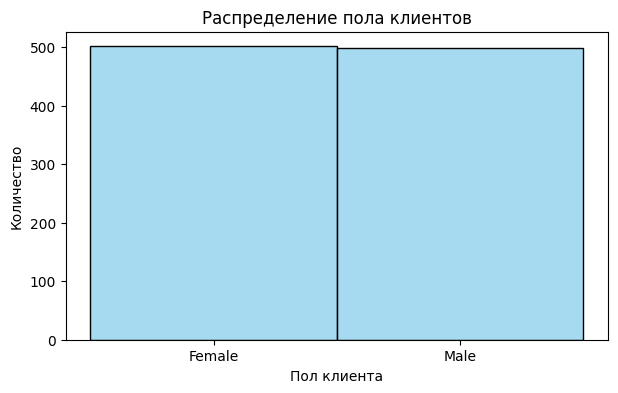

Female    501
Male      499
Name: gender, dtype: int64


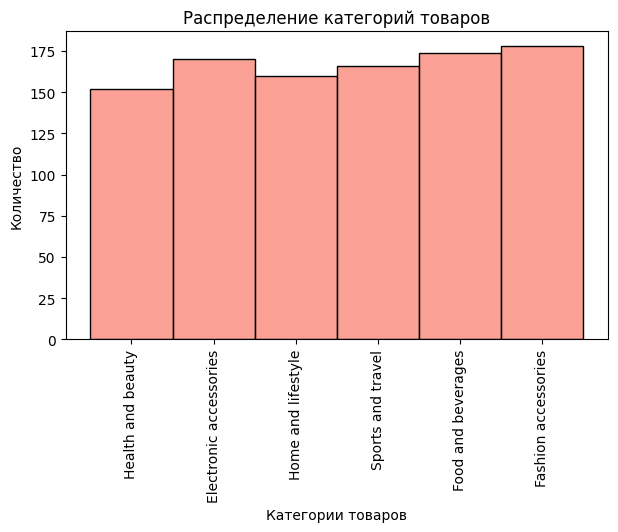

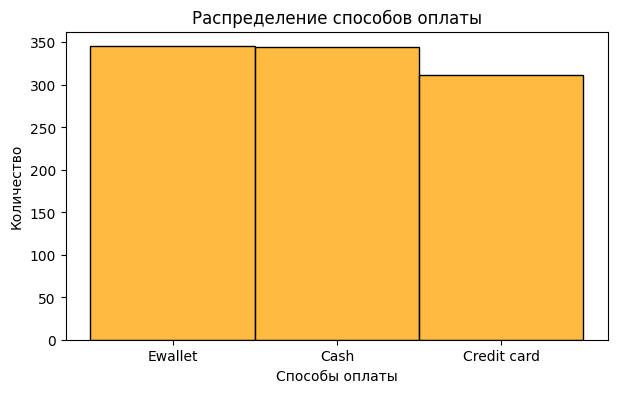

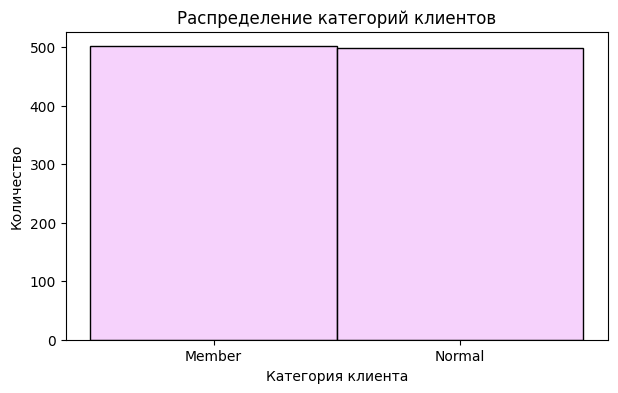

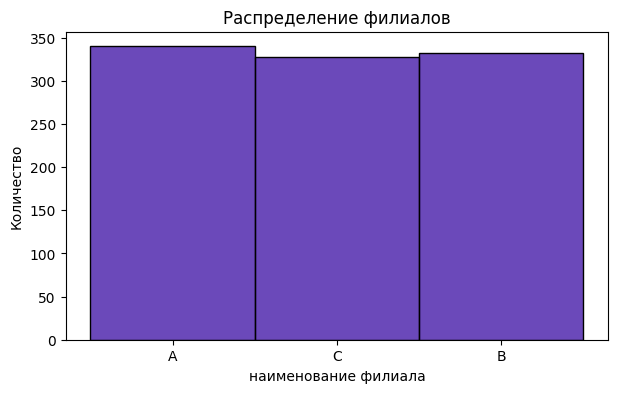

In [54]:
# Гистограмма пола клиентов
plt.figure(figsize=(7, 4))
sns.histplot(df['gender'], color='skyblue')
plt.xlabel('Пол клиента')
plt.ylabel('Количество')
plt.title('Распределение пола клиентов')
plt.show()
print(df.gender.value_counts())

# Гистограмма категорий товаров
plt.figure(figsize=(7, 4))
gr = sns.histplot(df['product_line'], color='salmon')
plt.setp(gr.get_xticklabels(),rotation=90)
plt.xlabel('Категории товаров')
plt.ylabel('Количество')
plt.title('Распределение категорий товаров')
plt.show()

# Гистограмма метода оплаты
plt.figure(figsize=(7, 4))
sns.histplot(df['payment'], color='orange')
plt.xlabel('Способы оплаты')
plt.ylabel('Количество')
plt.title('Распределение способов оплаты')
plt.show()

# Гистограмма лояльности клиентов
plt.figure(figsize=(7, 4))
sns.histplot(df['customer_type'], color='#f3c4fb')
plt.xlabel('Категория клиента')
plt.ylabel('Количество')
plt.title('Распределение категорий клиентов')
plt.show()

# Гистограмма филиалов
plt.figure(figsize=(7, 4))
sns.histplot(df['branch'], color='#3A0CA3')
plt.xlabel('наименование филиала')
plt.ylabel('Количество')
plt.title('Распределение филиалов')
plt.show()

- Соотношение клиентов по половому признаку примерно одинаковое
- Чаще продаются категорий товаров: Fashion accessories, Food and beverages, Electronic accessories. Реже всего продаются товары категории: Health and beauty
- Клиенты чаще выбирают способы оплаты: Ewallet, Cash.
- Соотношение клиентов по наличию карты лояльности примерно одинаковое.

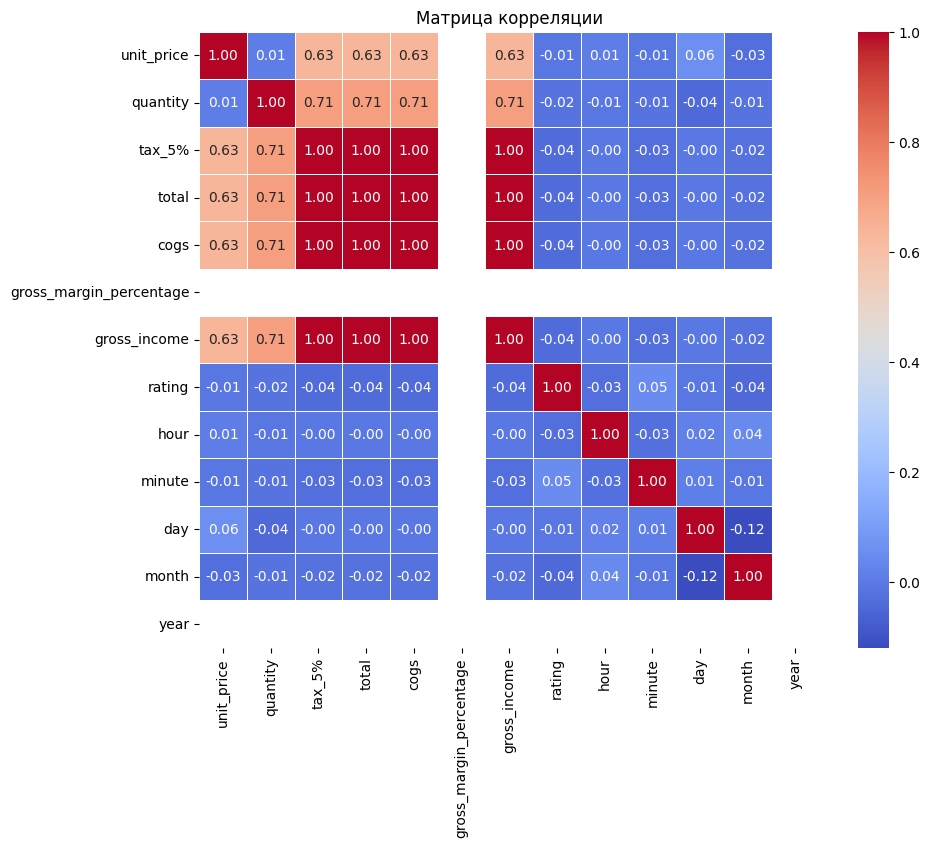

In [12]:
# Построим матрицу корреляции между признаками и визуализируем ее с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

- Значимая корреляция проявляется между кол-вом купленного товара и такими признаками как: размер налогового сбора, общая стоимость покупки, себестоимость товаров, валовый доход.

Text(0, 0.5, 'Рэйтинг')

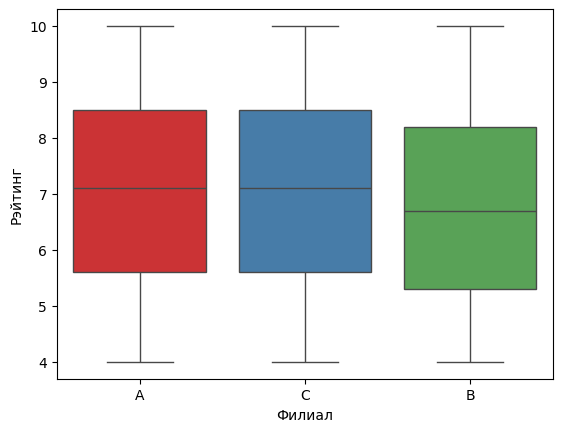

In [13]:
# Распределение среднего рейтинга между филиалами
sns.boxplot(df, x='branch', y='rating', palette='Set1')
plt.xlabel('Филиал')
plt.ylabel('Рэйтинг')

- Наименьший средний рейтинг наблюдается в филииале B

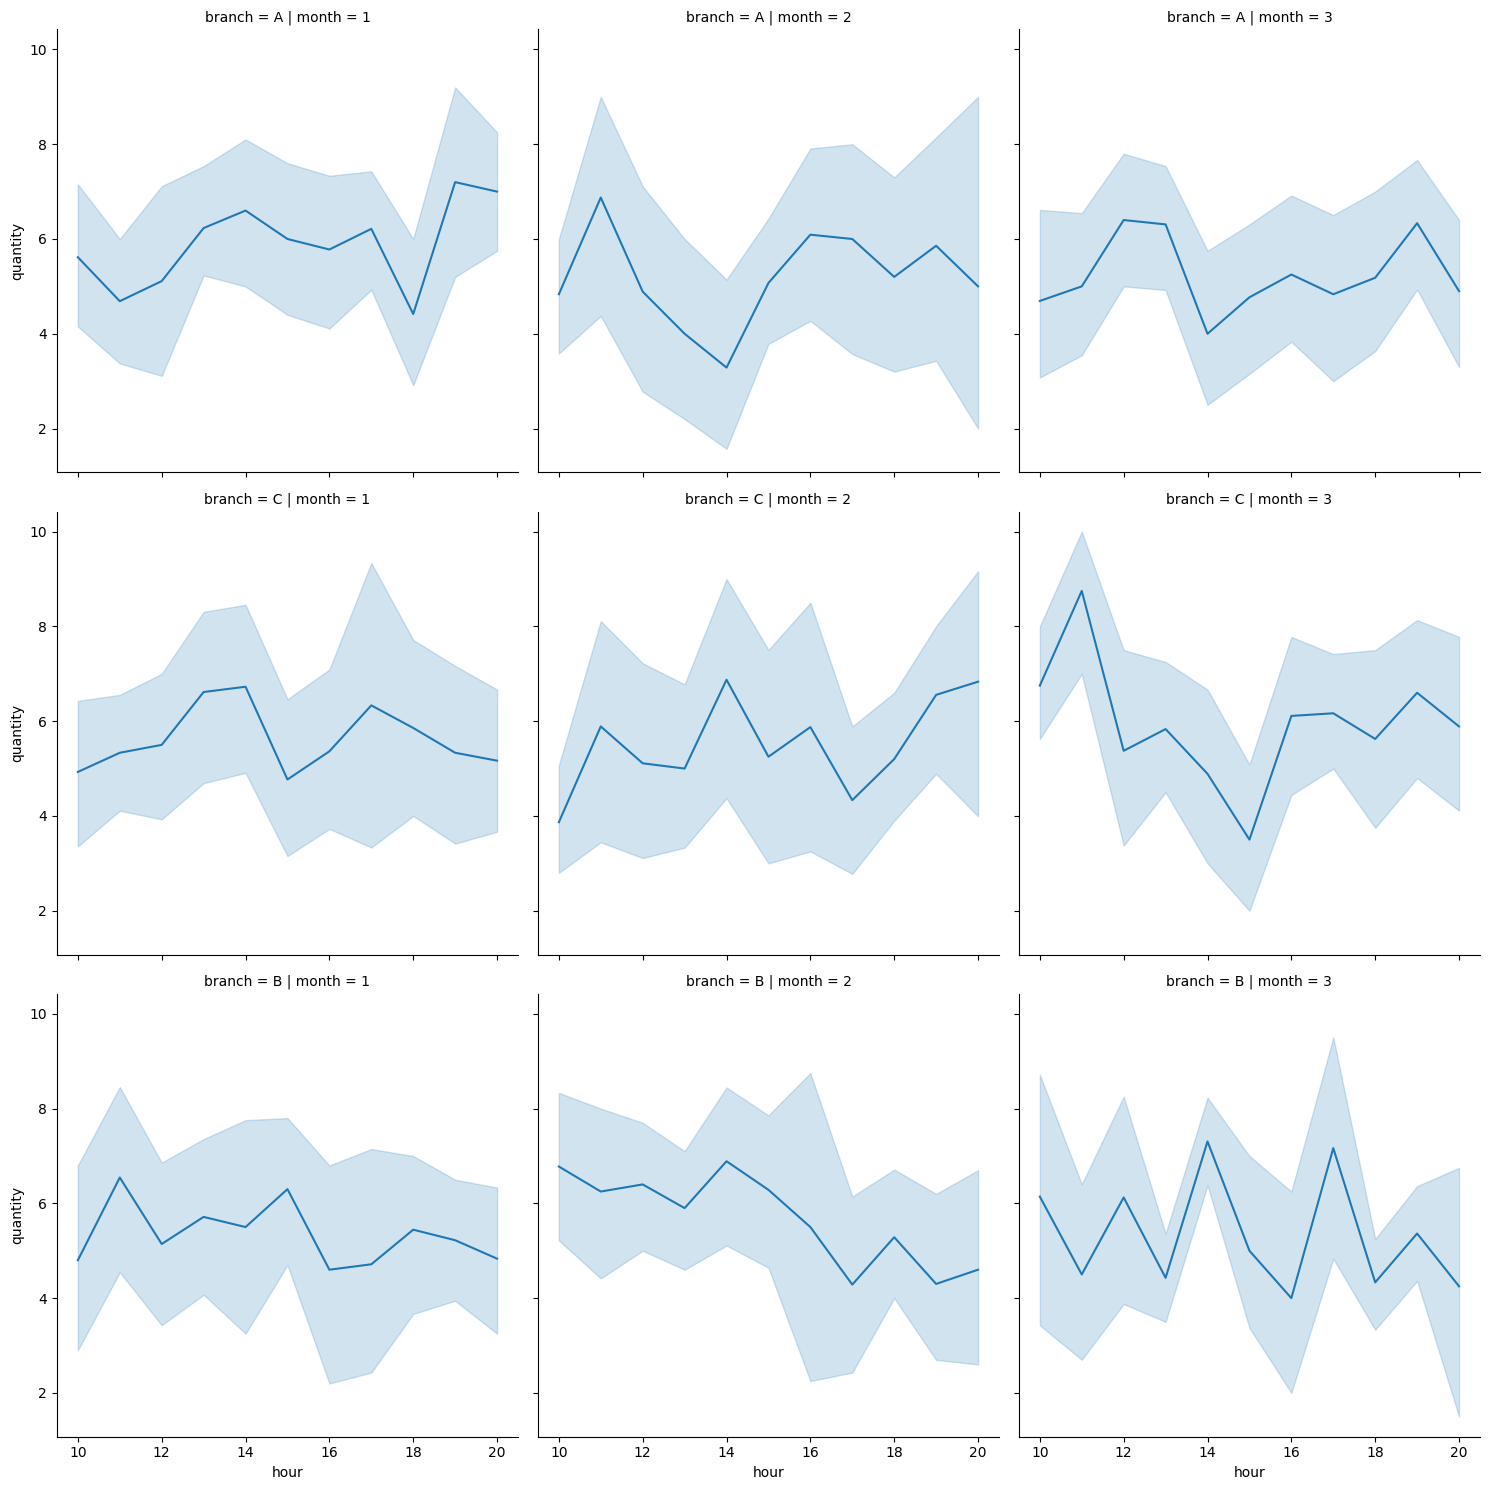

In [17]:
# Анализ объемов продаж по времени с разбивкой по месяцам и филиалам
sns.relplot(df, x='hour', y='quantity', col='month', row='branch', kind='line')

Выводы
- Филиал А
	- В первом месяце наибольшее кол-во товара приобретается в районе 19:00
	- Во втором месяце наибольшее кол-во товара приобретается в районе 11:00
	- В третьем месяце наибольшее кол-во товара приобретается в отрезке с 12:00 до 13:00 и 19:00
- Филиал B
	- В первом месяце наибольшее кол-во товара приобретается в районе 11:00
	- Во втором месяце наибольшее кол-во товара приобретается в районе 10:00 и 14:00
	- В третьем месяце наибольшее кол-во товара приобретается в 14:00 и 17:00
- Филиал С
	- В первом месяце наибольшее кол-во товара приобретается в отрезке 13:00-14:00 и 17:00
	- Во втором месяце наибольшее кол-во товара приобретается в районе 14:00 и 20:00
	- В третьем месяце наибольшее кол-во товара приобретается в районе 11:00

In [46]:
# Анализ валового дохода в разрезе категорий товаром и филиалов
print("Филиал A: ", "\n", df.query("branch =='A'").groupby('product_line', as_index=False).agg({'gross_income': 'sum'}).sort_values('gross_income', ascending=False))
print("Филиал B: ", "\n", df.query("branch =='B'").groupby('product_line', as_index=False).agg({'gross_income': 'sum'}).sort_values('gross_income', ascending=False))
print("Филиал C: ", "\n", df.query("branch =='C'").groupby('product_line', as_index=False).agg({'gross_income': 'sum'}).sort_values('gross_income', ascending=False))

Филиал A:  
              product_line  gross_income
4      Home and lifestyle     1067.4855
5       Sports and travel      922.5095
0  Electronic accessories      872.2435
2      Food and beverages      817.2905
1     Fashion accessories      777.7385
3       Health and beauty      599.8930
Филиал B:  
              product_line  gross_income
5       Sports and travel      951.8190
3       Health and beauty      951.4600
4      Home and lifestyle      835.6745
0  Electronic accessories      811.9735
1     Fashion accessories      781.5865
2      Food and beverages      724.5185
Филиал C:  
              product_line  gross_income
2      Food and beverages     1131.7550
1     Fashion accessories     1026.6700
0  Electronic accessories      903.2845
3       Health and beauty      791.2060
5       Sports and travel      750.5680
4      Home and lifestyle      661.6930


Text(0.5, 1.0, 'Распределение валового дохода по категориям товаров и филиалам')

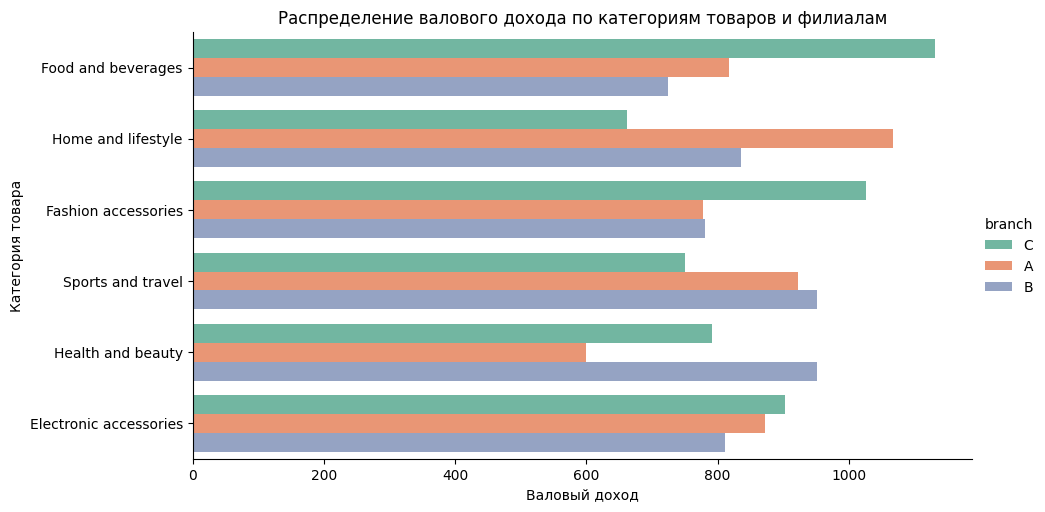

In [47]:
sns.catplot(df.groupby(['product_line', 'branch'], as_index=False).agg({'gross_income': 'sum'}).sort_values('gross_income', ascending=False), y='product_line', x='gross_income', kind='bar', hue='branch', palette='Set2', aspect=2)
plt.ylabel('Категория товара')
plt.xlabel('Валовый доход')
plt.title('Распределение валового дохода по категориям товаров и филиалам')

- Самая доходная категория Food and beverages в филиале С
- Наименьший доход наблюдается в категории Health and beauty филиала А

In [14]:
df.sample(1)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minute,day,month,year
966,558-60-5016,A,Yangon,Normal,Female,Home and lifestyle,33.3,9,14.985,314.685,Ewallet,299.7,4.761905,14.985,7.2,15,27,4,3,2019


Средний чек по типам клиентов:                      total
customer_type            
Member         327.791305
Normal         318.122856


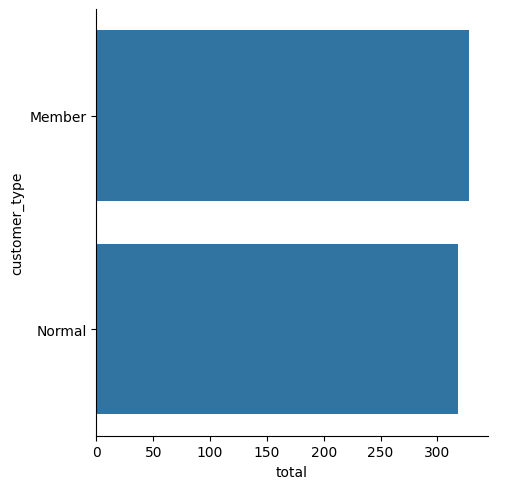

In [61]:
# Анализ среднего чека в разрезе типа клиента
print('Средний чек по типам клиентов: ', df.groupby('customer_type').agg({'total': 'mean'}))
sns.catplot(df.groupby('customer_type', as_index=False).agg({'total': 'mean'}), x='total', y='customer_type', kind='bar')

- Средний чек у клиентов имеющих карту участника сети магазинов немного выше чем у клиентов без карты